<a href="https://colab.research.google.com/github/darvesh-sd/Copy-of-TPSessions.ipynb/blob/main/TP_7_La_stylom%C3%A9trie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Set Up the Environment**

In [37]:
!pip install nltk matplotlib wordcloud scikit-learn PyPDF2

**Import Libraries**

In [38]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
from PyPDF2 import PdfReader
import os
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

**Download Necessary NLTK Data**

In [39]:
# Ensure punkt tokenizer is available
try:
    nltk.data.find('tokenizers/punkt')
    print("punkt resource already available.")
except LookupError:
    print("Downloading punkt resource...")
    nltk.download('punkt', download_dir='/content/nltk_data')  # Custom download directory
    nltk.data.path.append('/content/nltk_data')  # Add custom path if necessary


punkt resource already available.


**Upload and Extract Text from PDFs**

In [40]:
from google.colab import files

# Upload PDF files
uploaded = files.upload()

# Function to extract text from PDF files
def extract_text_from_pdf(file):
    reader = PdfReader(file)
    text = ""
    for page in reader.pages:
        text += page.extract_text()
    return text

# Extract text from uploaded PDFs
texts = {}
for filename in uploaded.keys():
    try:
        texts[filename] = extract_text_from_pdf(filename)
    except Exception as e:
        print(f"Error extracting text from {filename}: {str(e)}")

# Display the first 500 characters of extracted text
for title, content in texts.items():
    print(f"First 1000 characters of {title}:\n{content[:1000]}\n")


Saving MOLIERE_FEMMESSAVANTES.pdf to MOLIERE_FEMMESSAVANTES.pdf
First 1000 characters of MOLIERE_FEMMESSAVANTES.pdf:
LES FEMMES
SAVANTES
COMÉDIE
MOLIÈRE
1672
Publié par Gwénola, Ernest et Paul Fièvre, Mai 2015
- 1 -- 2 -LES FEMMES
SAVANTES
COMÉDIE
Par J.B.P. MOLIÈRE
Et se vend pour l'auteur. À PARIS, au Palais, et Chez PIERRE
PROME, sur le Quai des Grands-Augustins, à la Charité.
M. DC. LXXII. AVEC PRIVILÈGE DU ROI
- 3 -ACTEURS
CHRYSALE, bon bourgeois.
PHILAMINTE, femme de Chrysale.
ARMANDE, fille de Chrysale et de Philaminte.
HENRIETTE, fille de Chrysale et de Philaminte.
ARISTE, frère de Chrysale.
BÉLISE, soeur de Chrysale.
CLITANDRE, amant d'Henriette.
TRISSOTIN, bel esprit.
VADIUS, savant.
MARTINE, servante de cuisine.
L'ÉPINE, laquais de Trissotin.
JULIEN, valet de Vadius.
LE NOTAIRE.
La scène est à Paris.
- 4 -ACTE I
SCÈNE I.
Armande, Henriette.
ARMANDE.
Quoi, le beau nom de fille est un titre, ma soeur,
Dont vous voulez quitter la charmante douceur ?
Et de vous marier vous osez 

**Clean and Preprocess Texts**

In [41]:
def clean_text(text):
    """Clean text by removing metadata, special characters, and extra spaces."""
    text = re.sub(r'\n', ' ', text)  # Replace newlines with spaces
    text = re.sub(r'[^a-zA-Zàâçéèêëîïôûùüÿñæœ \n]', '', text)  # Keep only letters and spaces
    text = re.sub(r'\s+', ' ', text).strip().lower()  # Remove extra spaces and convert to lowercase
    return text

# Clean all extracted texts
cleaned_texts = {title: clean_text(content) for title, content in texts.items()}

# Display the first 500 characters of cleaned text
for title, content in cleaned_texts.items():
    print(f"Cleaned first 500 characters of {title}:\n{content[:500]}\n")


Cleaned first 500 characters of MOLIERE_FEMMESSAVANTES.pdf:
les femmes savantes comdie molire publié par gwénola ernest et paul fièvre mai les femmes savantes comdie par jbp molire et se vend pour lauteur paris au palais et chez pierre prome sur le quai des grandsaugustins à la charité m dc lxxii avec privilge du roi acteurs chrysale bon bourgeois philaminte femme de chrysale armande fille de chrysale et de philaminte henriette fille de chrysale et de philaminte ariste frère de chrysale blise soeur de chrysale clitandre amant dhenriette trissotin bel esp



**Tokenize Texts**

In [42]:
# Tokenize each text into words
tokenized_texts = {}
for title, content in cleaned_texts.items():
    try:
        tokenized_texts[title] = word_tokenize(content)
    except Exception as e:
        print(f"Error tokenizing {title}: {str(e)}")

# Display the first 10 tokens of each text
for title, tokens in tokenized_texts.items():
    print(f"First 10 tokens of {title}: {tokens[:10]}")


First 10 tokens of MOLIERE_FEMMESSAVANTES.pdf: ['les', 'femmes', 'savantes', 'comdie', 'molire', 'publié', 'par', 'gwénola', 'ernest', 'et']


In [43]:
# Ensure punkt is available
try:
    nltk.data.find('tokenizers/punkt')
    print("punkt resource already exists.")
except LookupError:
    print("Downloading punkt resource...")
    nltk.download('punkt', download_dir='/content/nltk_data')  # Download to a custom directory
    nltk.data.path.append('/content/nltk_data')  # Add the custom directory to nltk's path

# Tokenize each text into words
tokenized_texts = {}
for title, content in cleaned_texts.items():
    try:
        tokenized_texts[title] = word_tokenize(content)
    except Exception as e:
        print(f"Error tokenizing {title}: {str(e)}")

# Display the first 10 tokens of each text
for title, tokens in tokenized_texts.items():
    print(f"First 10 tokens of {title}: {tokens[:10]}")


punkt resource already exists.
First 10 tokens of MOLIERE_FEMMESSAVANTES.pdf: ['les', 'femmes', 'savantes', 'comdie', 'molire', 'publié', 'par', 'gwénola', 'ernest', 'et']


**Stylometry Analysis**

Word Frequency Distribution

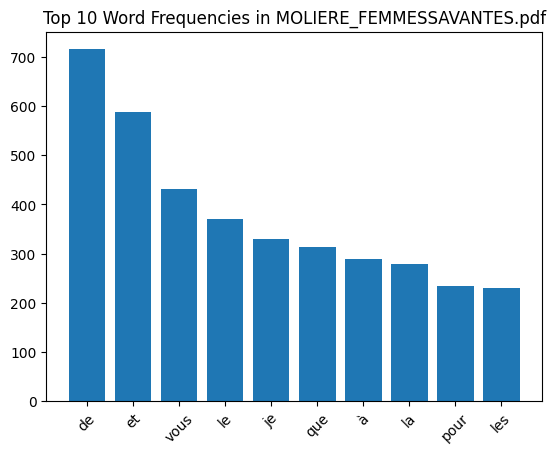

In [44]:
# Analyze word frequencies and plot top 10 words
for title, tokens in tokenized_texts.items():
    word_counts = Counter(tokens)
    most_common = word_counts.most_common(10)

    # Plot
    words, counts = zip(*most_common)
    plt.bar(words, counts)
    plt.title(f"Top 10 Word Frequencies in {title}")
    plt.xticks(rotation=45)
    plt.show()


Lexical Richness

In [45]:
# Calculate lexical richness
for title, tokens in tokenized_texts.items():
    total_words = len(tokens)
    unique_words = len(set(tokens))
    ttr = unique_words / total_words

    print(f"{title} - Total Words: {total_words}, Unique Words: {unique_words}, TTR: {ttr:.2f}")


MOLIERE_FEMMESSAVANTES.pdf - Total Words: 19294, Unique Words: 3730, TTR: 0.19


Average Sentence Length

In [46]:
# Tokenize sentences and calculate average length
sentence_lengths = {}
for title, content in cleaned_texts.items():
    sentences = sent_tokenize(content)
    avg_length = sum(len(word_tokenize(sent)) for sent in sentences) / len(sentences)
    sentence_lengths[title] = avg_length

# Display results
for title, avg_length in sentence_lengths.items():
    print(f"Average Sentence Length in {title}: {avg_length:.2f} words")


Average Sentence Length in MOLIERE_FEMMESSAVANTES.pdf: 19294.00 words


 Word Clouds

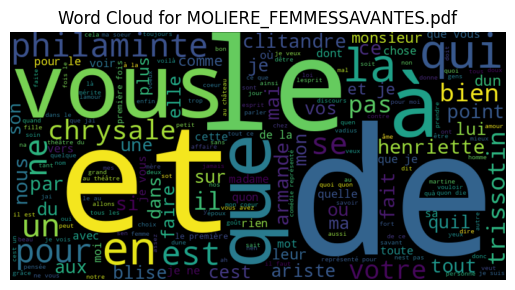

In [47]:
# Generate and display word clouds
for title, content in cleaned_texts.items():
    wordcloud = WordCloud(width=800, height=400).generate(content)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {title}")
    plt.show()


**Comparing Stylistic Similarities**

In [48]:
# Vectorize all cleaned texts
vectorizer = CountVectorizer().fit_transform(cleaned_texts.values())
vectors = vectorizer.toarray()

# Compute pairwise cosine similarity
similarities = cosine_similarity(vectors)

# Display similarity matrix
import pandas as pd
titles = list(cleaned_texts.keys())
similarity_df = pd.DataFrame(similarities, index=titles, columns=titles)

# Show as a table
print(similarity_df)


                            MOLIERE_FEMMESSAVANTES.pdf
MOLIERE_FEMMESSAVANTES.pdf                         1.0


**Save Results**

In [49]:
# Save similarity matrix to CSV
similarity_df.to_csv('stylistic_similarity.csv')

# Download CSV
from google.colab import files
files.download('stylistic_similarity.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>